In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import keras library
import keras
# import Sequential from the keras models module
from keras import Sequential
# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
y = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/pizza/y.csv",delimiter=',')
x = np.load('C:/Users/david/Documents/0_kul/1_ma_stds_1/1_advanced_analytics/assignment_2/data/pizza/image_pixel_200.npy') # loading it
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y.shape)

x_train shape: (611, 200, 200, 3)
611 train samples
263 test samples
(874, 4)


In [3]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [4]:
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [5]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5)
modelCheckpoint = ModelCheckpoint('best_model.hdf5',save_best_only=True)

In [6]:
def create_model(learning_rate,kernel,acti_function,acti_output,loss_f):
    opt = Adam(lr=learning_rate)
    model = Sequential()
    model.add(Conv2D(50,kernel_size=kernel,activation=acti_function,input_shape=(200,200,3)))
    model.add(MaxPooling2D(4))
    model.add(Conv2D(25,kernel_size=kernel,activation=acti_function))
    model.add(MaxPooling2D(3))
    model.add(Flatten())
    model.add(Dense(4,activation=acti_output))
    model.compile(optimizer = opt, loss=loss_f,metrics=['accuracy'])
    return model

In [7]:
best_model = create_model(learning_rate = 0.001 , kernel = 3, acti_function = 'sigmoid',
                          acti_output = 'softmax', loss_f = 'binary_crossentropy')

In [8]:
h_callback = best_model.fit(x_train, y_train,epochs = 100, batch_size = 10,
                    callbacks = [early_stopping,modelCheckpoint],
                    validation_split = 0.3)

Train on 427 samples, validate on 184 samples
Epoch 1/100
427/427 [==============================] - 10s 22ms/step - loss: 0.6992 - accuracy: 0.7119 - val_loss: 0.5735 - val_accuracy: 0.7337
Epoch 2/100
427/427 [==============================] - 9s 22ms/step - loss: 0.5731 - accuracy: 0.7301 - val_loss: 0.5728 - val_accuracy: 0.7337
Epoch 3/100
427/427 [==============================] - 9s 22ms/step - loss: 0.5706 - accuracy: 0.7301 - val_loss: 0.5733 - val_accuracy: 0.7337
Epoch 4/100
427/427 [==============================] - 9s 22ms/step - loss: 0.5722 - accuracy: 0.7301 - val_loss: 0.5713 - val_accuracy: 0.7337
Epoch 5/100
427/427 [==============================] - 9s 22ms/step - loss: 0.5716 - accuracy: 0.7301 - val_loss: 0.5723 - val_accuracy: 0.7337
Epoch 6/100
427/427 [==============================] - 9s 21ms/step - loss: 0.5652 - accuracy: 0.7324 - val_loss: 0.6171 - val_accuracy: 0.6984
Epoch 7/100
427/427 [==============================] - 9s 21ms/step - loss: 0.5689 - accu

In [9]:
best_model.evaluate(x_train,y_train)

611/611 [==============================] - 4s 7ms/step


[0.4447590884327303, 0.8011456727981567]

In [10]:
best_model.evaluate(x_test,y_test)

263/263 [==============================] - 2s 7ms/step


[0.5718362405046311, 0.7366920113563538]

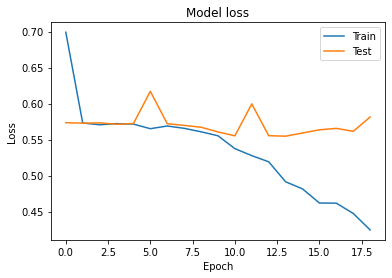

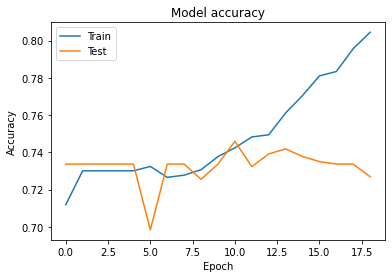

In [11]:
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

In [12]:
from keras.models import model_from_json
#serialize model to JSON
model_json = best_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
best_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
